In [15]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Function to estimate integral: s length of edge, d number of dimensions, N number of samples
def estimate_integral(s,d,N):
    r = np.random.rand(N,d)*s # multiply by s to scale [0,1) to [0,s)
    return (10**6)*(s**d)*(np.sum(np.sin(np.sum(r,axis=1))))/N # axis=1 means sum over each of N d-dimensional arrays first

In [17]:
# Calculate best value and its error for each N
s = np.pi/8
d = 8

N = 1000
n_t = 20

sum_of_estimate = []
sum_of_squared_estimate = []

for i in np.arange(1,N,1):
    dummy_sum = 0
    dummy_sum_of_squared = 0
    for j in range(0,n_t):
        estimate = estimate_integral(s,d,int(i))
        dummy_sum += estimate
        dummy_sum_of_squared += estimate**2
    sum_of_estimate.append(dummy_sum)
    sum_of_squared_estimate.append(dummy_sum_of_squared)

sum_of_estimate = np.array(sum_of_estimate)
sum_of_squared_estimate = np.array(sum_of_squared_estimate)

mean = sum_of_estimate/n_t
std_error = np.sqrt(sum_of_squared_estimate/n_t-(mean**2))

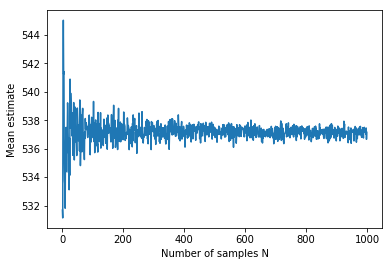

In [18]:
# Plot mean
plt.plot(np.arange(1,N,1),mean)
plt.xlabel("Number of samples N")
plt.ylabel("Mean estimate")
plt.savefig("Mean_vs_N.pdf")

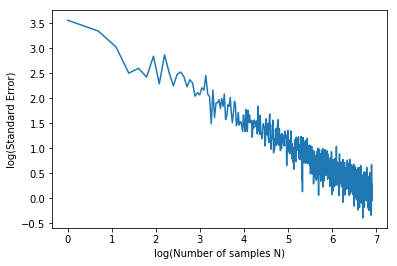

In [19]:
# Plot std_error
plt.plot(np.log(np.arange(1,N,1)),np.log(std_error))
plt.xlabel("log(Number of samples N)")
plt.ylabel("log(Standard Error)")
plt.savefig("Error_vs_N.pdf")

In [20]:
# Calculate theoretical error
theoretical_error = []

for i in np.arange(1,N,1):
    r = np.random.rand(i,8)*s
    sigma = (10**6)*(s**d)*np.sqrt((((np.sum((np.sin(np.sum(r,axis=1)))**2))/i)-(((np.sum(np.sin(np.sum(r,axis=1))))/i)**2))/i)
    theoretical_error.append(sigma)

theoretical_error = np.array(theoretical_error)

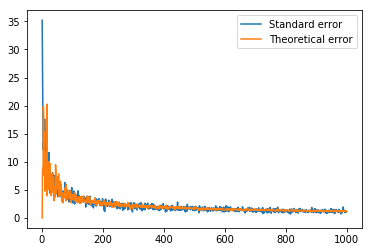

In [21]:
# Plot std_error and theoretical_error vs N
plt.plot(np.arange(1,N,1),std_error)
plt.plot(np.arange(1,N,1),theoretical_error)
plt.legend(['Standard error', 'Theoretical error'], loc='upper right')
plt.savefig("Std_Error_and_Theoretical_Error_vs_N.pdf")